In [7]:
from simple_vp import *
import time
import matplotlib.pyplot as plt
%matplotlib inline

## 1. VPTREE TWO DEMENTION TEST

creating...
done 3.5390241146087646
searching...
expanded 12821
skipped level:10 26
skipped level:11 42
skipped level:12 60
skipped level:13 91
skipped level:14 155
skipped level:15 210
skipped level:16 135
skipped level:3 3
skipped level:4 1
skipped level:5 3
skipped level:6 6
skipped level:7 6
skipped level:8 11
skipped level:9 24
out: 30
done 0.10547995567321777


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


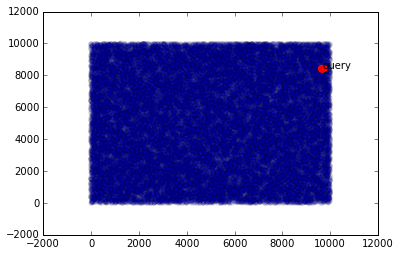

In [26]:
def main():

    rn = lambda: random.randint(0, 10000)
    aset = [(rn(), rn()) for i in range(40000)]
    q = (rn(), rn())
    rad = 9990
    distance = lambda a, b: math.sqrt(sum([((x-y)**2) for x, y in zip(a, b)]))

    s = time.time()
    print("creating...")
    root = VpNode(aset, distance=distance)
    print("done", time.time() - s)
    s = time.time()
    print("searching...")

    se = VpSearch(root, q, rad, 30)
    #out = se.search()
    out = se.knn()
    for k, v in sorted(se.stat.items()):
        print(k, v)

    print("out: %s" % len(out))
    print("done", time.time() - s)

    try:
        projx = lambda x: map(lambda y: y[0], x)
        projy = lambda x: map(lambda y: y[1], x)
        fig, ax = plt.subplots()
        ax.scatter(list(projx(aset)), list(projy(aset)), s = 20, alpha=0.1)
        ax.scatter([q[0]], [q[1]], s = 40, color='g')
        ax.scatter(list(projx(out)), list(projy(out)), s = 10, color='r')

        ax.annotate("query", xy=q)
        plt.show()
    except:
        pass

if __name__ == '__main__':
    main()


## 2. VPTREE Words Corpus

In [56]:
def levenshtein(a,b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n

    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]


def main(file_name):
    f = open(file_name)
    next(f)
    aset = [w.strip() for w in f]
    rad = 4.4

    distance = levenshtein

    s = time.time()
    print("\ninput set %s points" % len(aset))
    print("creating tree...")
    root = VpNode(aset, distance=distance)
    print("created: %s nodes" % VpNode.ids)
    print("done in s: %s" % (time.time() - s))
    print("searching...")
    while True:
        q = input(">>")
        s = time.time()
        se = VpSearch(root, q, rad, 10)
        out = se.knn()
        print(se.stat)
        print("founded %s results:" % len(out))
        
        count = 1
        for i in out:
            print('result {}: {}'.format(count, i))
            count += 1
        print("\n".join(out))
        print("done in s: %s" % (time.time() - s))

In [ ]:
main('README.md')


input set 12 points
creating tree...
created: count(1120078) nodes
done in s: 0.5686588287353516
searching...
>>implement
{'skipped level:2': 1, 'expanded': 5, 'skipped level:4': 1, 'skipped level:1': 1}
founded 2 results:
result 1: 
result 2: From Wiki

From Wiki
done in s: 0.0005660057067871094
